In [5]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ethan\\AppData\\Local\\Temp\\77c470a6-c207-4c59-b4e5-9f11f0c95854_stack-overflow-developer-survey-2023.zip.854\\survey_results_public.csv")

## Companies developers get paid the most

In [8]:
#making sure ConvertedCompYearly is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df= df.dropna(subset=['ConvertedCompYearly'])
#Grouping by company and calculate the mean compensation
company_compensation = df.groupby('OrgSize')['ConvertedCompYearly'].mean().reset_index()

#Sort companies by average compensation in descending order
sorted_compensation = company_compensation.sort_values(by='ConvertedCompYearly', ascending = False)

#Print the companies that pay the most
print(sorted_compensation)

                                             OrgSize  ConvertedCompYearly
9  Just me - I am a freelancer, sole proprietor, ...        158143.238072
2                           10,000 or more employees        150057.921463
6                           5,000 to 9,999 employees        113677.052351
0                           1,000 to 4,999 employees        105666.268853
7                               500 to 999 employees         98619.449275
4                                   2 to 9 employees         96851.132469
3                               100 to 499 employees         91449.094242
5                                 20 to 99 employees         88320.452085
8                                       I don’t know         85826.891753
1                                 10 to 19 employees         72292.481472


C:\Users\ethan\AppData\Local\Temp\ipykernel_13068\3194896920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')


## Importance of working remote

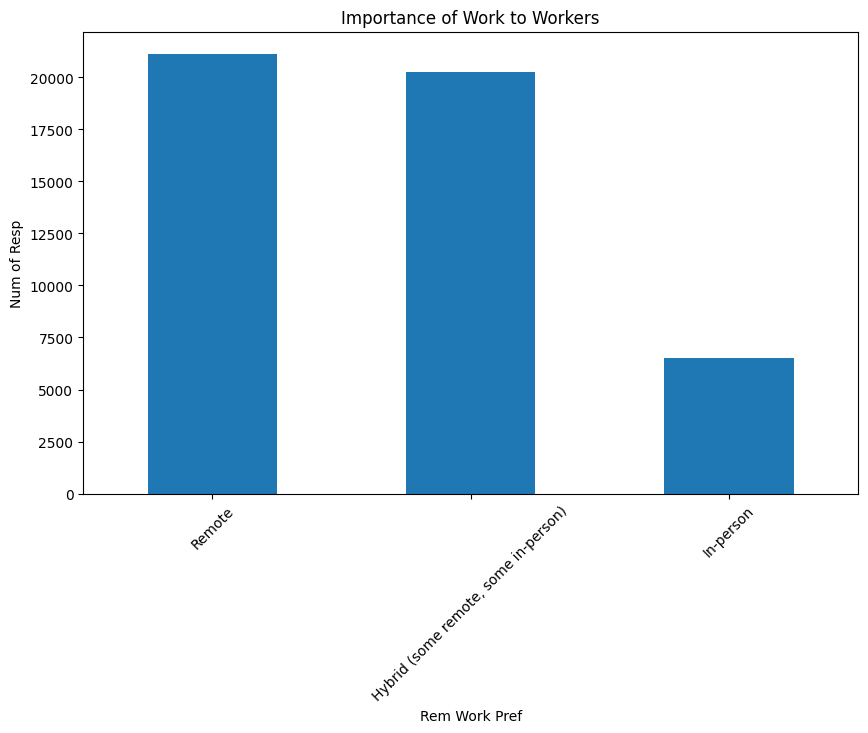

In [10]:
import matplotlib.pyplot as plt
remote_work_counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(10,6))
remote_work_counts.plot(kind='bar')
plt.title('Importance of Work to Workers')
plt.xlabel('Rem Work Pref')
plt.ylabel('Num of Resp')
plt.xticks(rotation=45)
plt.show()

## Coding Experience effect on Pay

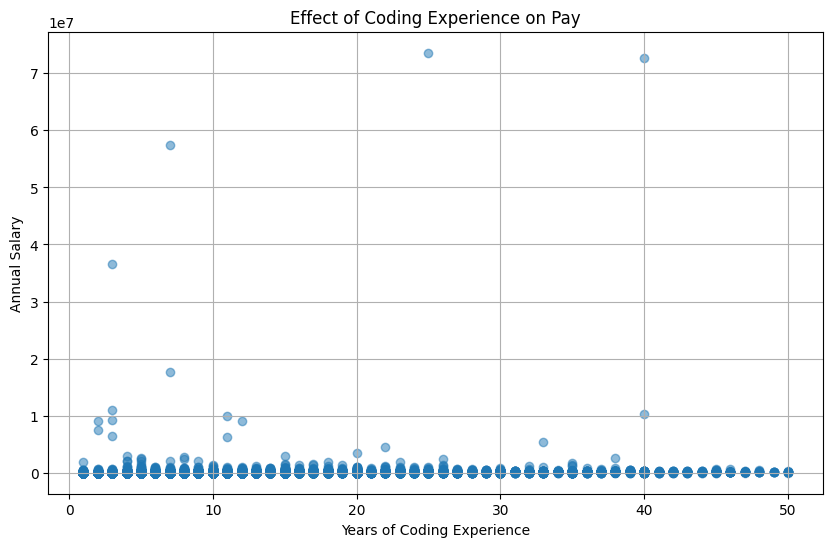

In [12]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df = df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'])

plt.figure(figsize=(10,6))
plt.scatter(df['YearsCodePro'], df['ConvertedCompYearly'], alpha=0.5)
plt.title('Effect of Coding Experience on Pay')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Annual Salary')
plt.grid(True)
plt.show()

## Most popular method of learning to code

<Figure size 1200x800 with 0 Axes>

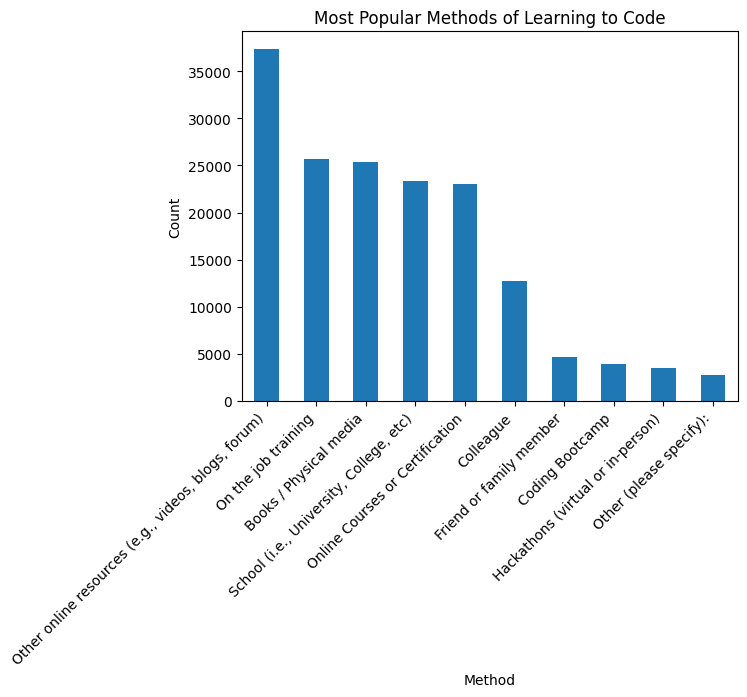

In [16]:
from collections import Counter
#Dropping Nan in learncode
df = df.dropna(subset=['LearnCode'])

#Split 'Learncode' by column and count each method
learn_code_methods = df['LearnCode'].str.split(';')
method_counts = Counter(method.strip() for methods in learn_code_methods for method in methods)
# Convert the Counter object to a DataFrame for easier plotting
method_counts_df = pd.DataFrame.from_dict(method_counts, orient='index', columns=['Count'])
method_counts_df = method_counts_df.sort_values(by='Count', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
method_counts_df.plot(kind='bar', legend=False)
plt.title('Most Popular Methods of Learning to Code')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Masters Degree effect on Job as Developer

In [18]:
dev_data = df[df['MainBranch'] == 'I am a developer by profession']
dev_data = dev_data[dev_data['EdLevel'].notna()]

#Count num of devs with & w/0 Master's Degree
dev_count_by_edu = dev_data.groupby(['EdLevel', 'DevType']).size().unstack(fill_value=0)

#Select only des with or without Masters for comparison
master_degree = "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
dev_count_master= dev_count_by_edu.loc[master_degree].sort_values(ascending=False)
dev_count_other = dev_count_by_edu.drop(index=master_degree).sum()
